<a href="https://colab.research.google.com/github/dakyommii/study/blob/main/test/Lpip_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Lpip loss calc test

##setup

In [ ]:
%cd /content/drive/MyDrive/설다경

/content/drive/MyDrive/설다경


In [ ]:
!git clone https://github.com/richzhang/PerceptualSimilarity


Cloning into 'PerceptualSimilarity'...
remote: Enumerating objects: 778, done.
remote: Counting objects: 100% (775/775), done.
remote: Compressing objects: 100% (316/316), done.
remote: Total 778 (delta 457), reused 774 (delta 456), pack-reused 3
Receiving objects: 100% (778/778), 8.75 MiB | 18.41 MiB/s, done.
Resolving deltas: 100% (457/457), done.


In [ ]:
%cd PerceptualSimilarity

/content/drive/MyDrive/설다경/PerceptualSimilarity


In [ ]:
!pip install -r requirements.txt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 120 kB 24.3 MB/s 
     |████████████████████████████████| 1.6 MB 49.4 MB/s 
     |████████████████████████████████| 82 kB 459 kB/s 


In [ ]:
!python test_network.py

Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [on]
/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:209: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  f"The parameter '{pretrained_param}' is deprecated since 0.13 and will be removed in 0.15, "
/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=AlexNet_Weights.IMAGENET1K_V1`. You can also use `weights=AlexNet_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Loading model from: /content/drive/MyDrive/설다경/PerceptualSimilarity/lpips/weights/v0.1/alex.pth
Distances: (0.722, 0.138)
Figure(640x480)


##code

In [ ]:
from matplotlib import pyplot as plt
import numpy as np
import cv2
# import matplotlib.pyplot as plt
from tqdm import tqdm

import glob, os

###imgs2dir

In [ ]:
import argparse
import os
import lpips

# parser = argparse.ArgumentParser(formatter_class=argparse.ArgumentDefaultsHelpFormatter)
# parser.add_argument('-d0','--dir0', type=str, default='./imgs/ex_dir0')
# parser.add_argument('-d1','--dir1', type=str, default='./imgs/ex_dir1')
# parser.add_argument('-o','--out', type=str, default='./imgs/example_dists.txt')
# parser.add_argument('-v','--version', type=str, default='0.1')
# parser.add_argument('--use_gpu', action='store_true', help='turn on flag to use GPU')

# opt = parser.parse_args()

## Initializing the model
loss_fn = lpips.LPIPS(net='alex',version='0.1')
loss_fn.cuda()

dir0='/content/drive/MyDrive/설다경/generate/real-minhwa-no-aug'
dir1='/content/drive/MyDrive/설다경/datasets/StyleGAN2-ada-pytorch/real-minhwa/00000'

# crawl directories
f = open('/content/drive/MyDrive/설다경/test/lipi-res-noAug.txt','w')
files = os.listdir(dir0)

for file in files:
	if(os.path.exists(os.path.join(dir1,file))):
		# Load images
		img0 = lpips.im2tensor(lpips.load_image(os.path.join(dir0,file))) # RGB image from [-1,1]
		img1 = lpips.im2tensor(lpips.load_image(os.path.join(dir1,file)))

		# if(opt.use_gpu):
    # img0 = img0.cuda()
    # img1 = img1.cuda()

		# Compute distance
		dist01 = loss_fn.forward(img0,img1)
		print('%s: %.3f'%(file,dist01))
# 		f.writelines('%s: %.6f\n'%(file,dist01))

f.close()


Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /content/drive/MyDrive/설다경/PerceptualSimilarity/lpips/weights/v0.1/alex.pth


###2imgs

In [ ]:
import argparse
import lpips

arr=[]

def lpip_func(i):

  ## Initializing the model
  loss_fn = lpips.LPIPS(net='alex',version='0.1')

  # if(opt.use_gpu):
  loss_fn.cuda()

  ## no-aug
  # if(i<10): path0='/content/drive/MyDrive/설다경/generate/real-minhwa-no-aug/seed000%d.png'%i 
  # elif(i<100): path0='/content/drive/MyDrive/설다경/generate/real-minhwa-no-aug/seed00%d.png'%i
  # else: path0='/content/drive/MyDrive/설다경/generate/real-minhwa-no-aug/seed0100.png'

  ## aug
  if(i<10): path0='/content/drive/MyDrive/설다경/test/lipi-tes/img0000000%d.png'%i 
  elif(i<100): path0='/content/drive/MyDrive/설다경/test/lipi-tes/img000000%d.png'%i 
  else: path0='/content/drive/MyDrive/설다경/test/lipi-tes/img000000%d.png'%i 

  ## no-aug
  # path1='/content/drive/MyDrive/설다경/result/StyleGAN2-ada-pytorch/real-minhwa/no-aug/12-12.png' 

  ## aug
  path1='/content/drive/MyDrive/설다경/result/StyleGAN2-ada-pytorch/real-minhwa/pic.png' 
                        

  # Load images
  img0 = lpips.im2tensor(lpips.load_image(path0)) # RGB image from [-1,1]
  img1 = lpips.im2tensor(lpips.load_image(path1))

  if(1):
    img0 = img0.cuda()
    img1 = img1.cuda()

  # Compute distance
  dist01 = loss_fn.forward(img0, img1)
  print('Distance: %.3f'%dist01)

  arr.append(float('%.3f'%dist01))


In [ ]:
for i in range(0,198):
  lpip_func(i)

arr

Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /content/drive/MyDrive/설다경/PerceptualSimilarity/lpips/weights/v0.1/alex.pth
Distance: 0.278
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /content/drive/MyDrive/설다경/PerceptualSimilarity/lpips/weights/v0.1/alex.pth
Distance: 0.531
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /content/drive/MyDrive/설다경/PerceptualSimilarity/lpips/weights/v0.1/alex.pth
Distance: 0.397
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /content/drive/MyDrive/설다경/PerceptualSimilarity/lpips/weights/v0.1/alex.pth
Distance: 0.452
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /content/drive/MyDrive/설다경/PerceptualSimilarity/lpips/weights/v0.1/alex.pth
Distance: 0.466
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1

TypeError: ignored

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm

In [ ]:
#List를 np array로 변환
# x=np.array(imgList)
x=np.array(arr)
x

array([0.278, 0.531, 0.397, 0.452, 0.466, 0.392, 0.26 , 0.454, 0.406,
       0.424, 0.572, 0.55 , 0.534, 0.427, 0.557, 0.536, 0.537, 0.531,
       0.499, 0.495, 0.526, 0.433, 0.408, 0.415, 0.483, 0.537, 0.504,
       0.505, 0.37 , 0.449, 0.401, 0.382, 0.459, 0.406, 0.407, 0.496,
       0.468, 0.5  , 0.451, 0.468, 0.513, 0.454, 0.358, 0.432, 0.521,
       0.436, 0.477, 0.479, 0.51 , 0.482, 0.54 , 0.484, 0.478, 0.348,
       0.521, 0.351, 0.567, 0.393, 0.516, 0.307, 0.315, 0.455, 0.234,
       0.529, 0.281, 0.312, 0.336, 0.55 , 0.192, 0.566, 0.41 , 0.534,
       0.57 , 0.595, 0.503, 0.577, 0.456, 0.451, 0.533, 0.555, 0.446,
       0.444, 0.441, 0.476, 0.363, 0.439, 0.517, 0.414, 0.349, 0.526,
       0.326, 0.285, 0.343, 0.3  , 0.272, 0.563, 0.527, 0.563, 0.579,
       0.571])

In [ ]:
#평균
m=np.mean(x)
# m=0

In [ ]:
#표준편차
std=np.std(x)
std

0.08955821514523388

In [ ]:
import scipy.stats as stats

# 확률밀도함수 계산
pdf = stats.norm.pdf(x, m, std)
pdf
# cv1_pdf

array([0.67020221, 3.02804794, 3.68113438, 4.4545315 , 4.40281703,
       3.55083519, 0.44416454, 4.45376514, 3.89710851, 4.23746829,
       1.82372247, 2.45716143, 2.938574  , 4.2801747 , 2.24946805,
       2.87860331, 2.84854572, 3.02804794, 3.88853241, 3.97617069,
       3.1753383 , 4.35220754, 3.9413889 , 4.08429807, 4.20053695,
       2.84854572, 3.77110216, 3.74664351, 2.9200064 , 4.4515168 ,
       3.78031468, 3.27315963, 4.44214709, 3.89710851, 3.9194305 ,
       3.95481722, 4.38671886, 3.86572123, 4.45408166, 4.38671886,
       3.54067185, 4.45376514, 2.55860515, 4.34147143, 3.31943053,
       4.38129671, 4.28845416, 4.26107036, 3.61993306, 4.21637766,
       2.75817892, 4.18423404, 4.27500682, 2.26063268, 3.31943053,
       2.34925697, 1.96194177, 3.57741266, 3.45926231, 1.19439792,
       1.37518461, 4.45254923, 0.2282993 , 3.0872805 , 0.71495255,
       1.30560744, 1.91670242, 2.45716143, 0.06520384, 1.99007364,
       3.98418496, 2.938574  , 1.87850405, 1.25192287, 3.79524

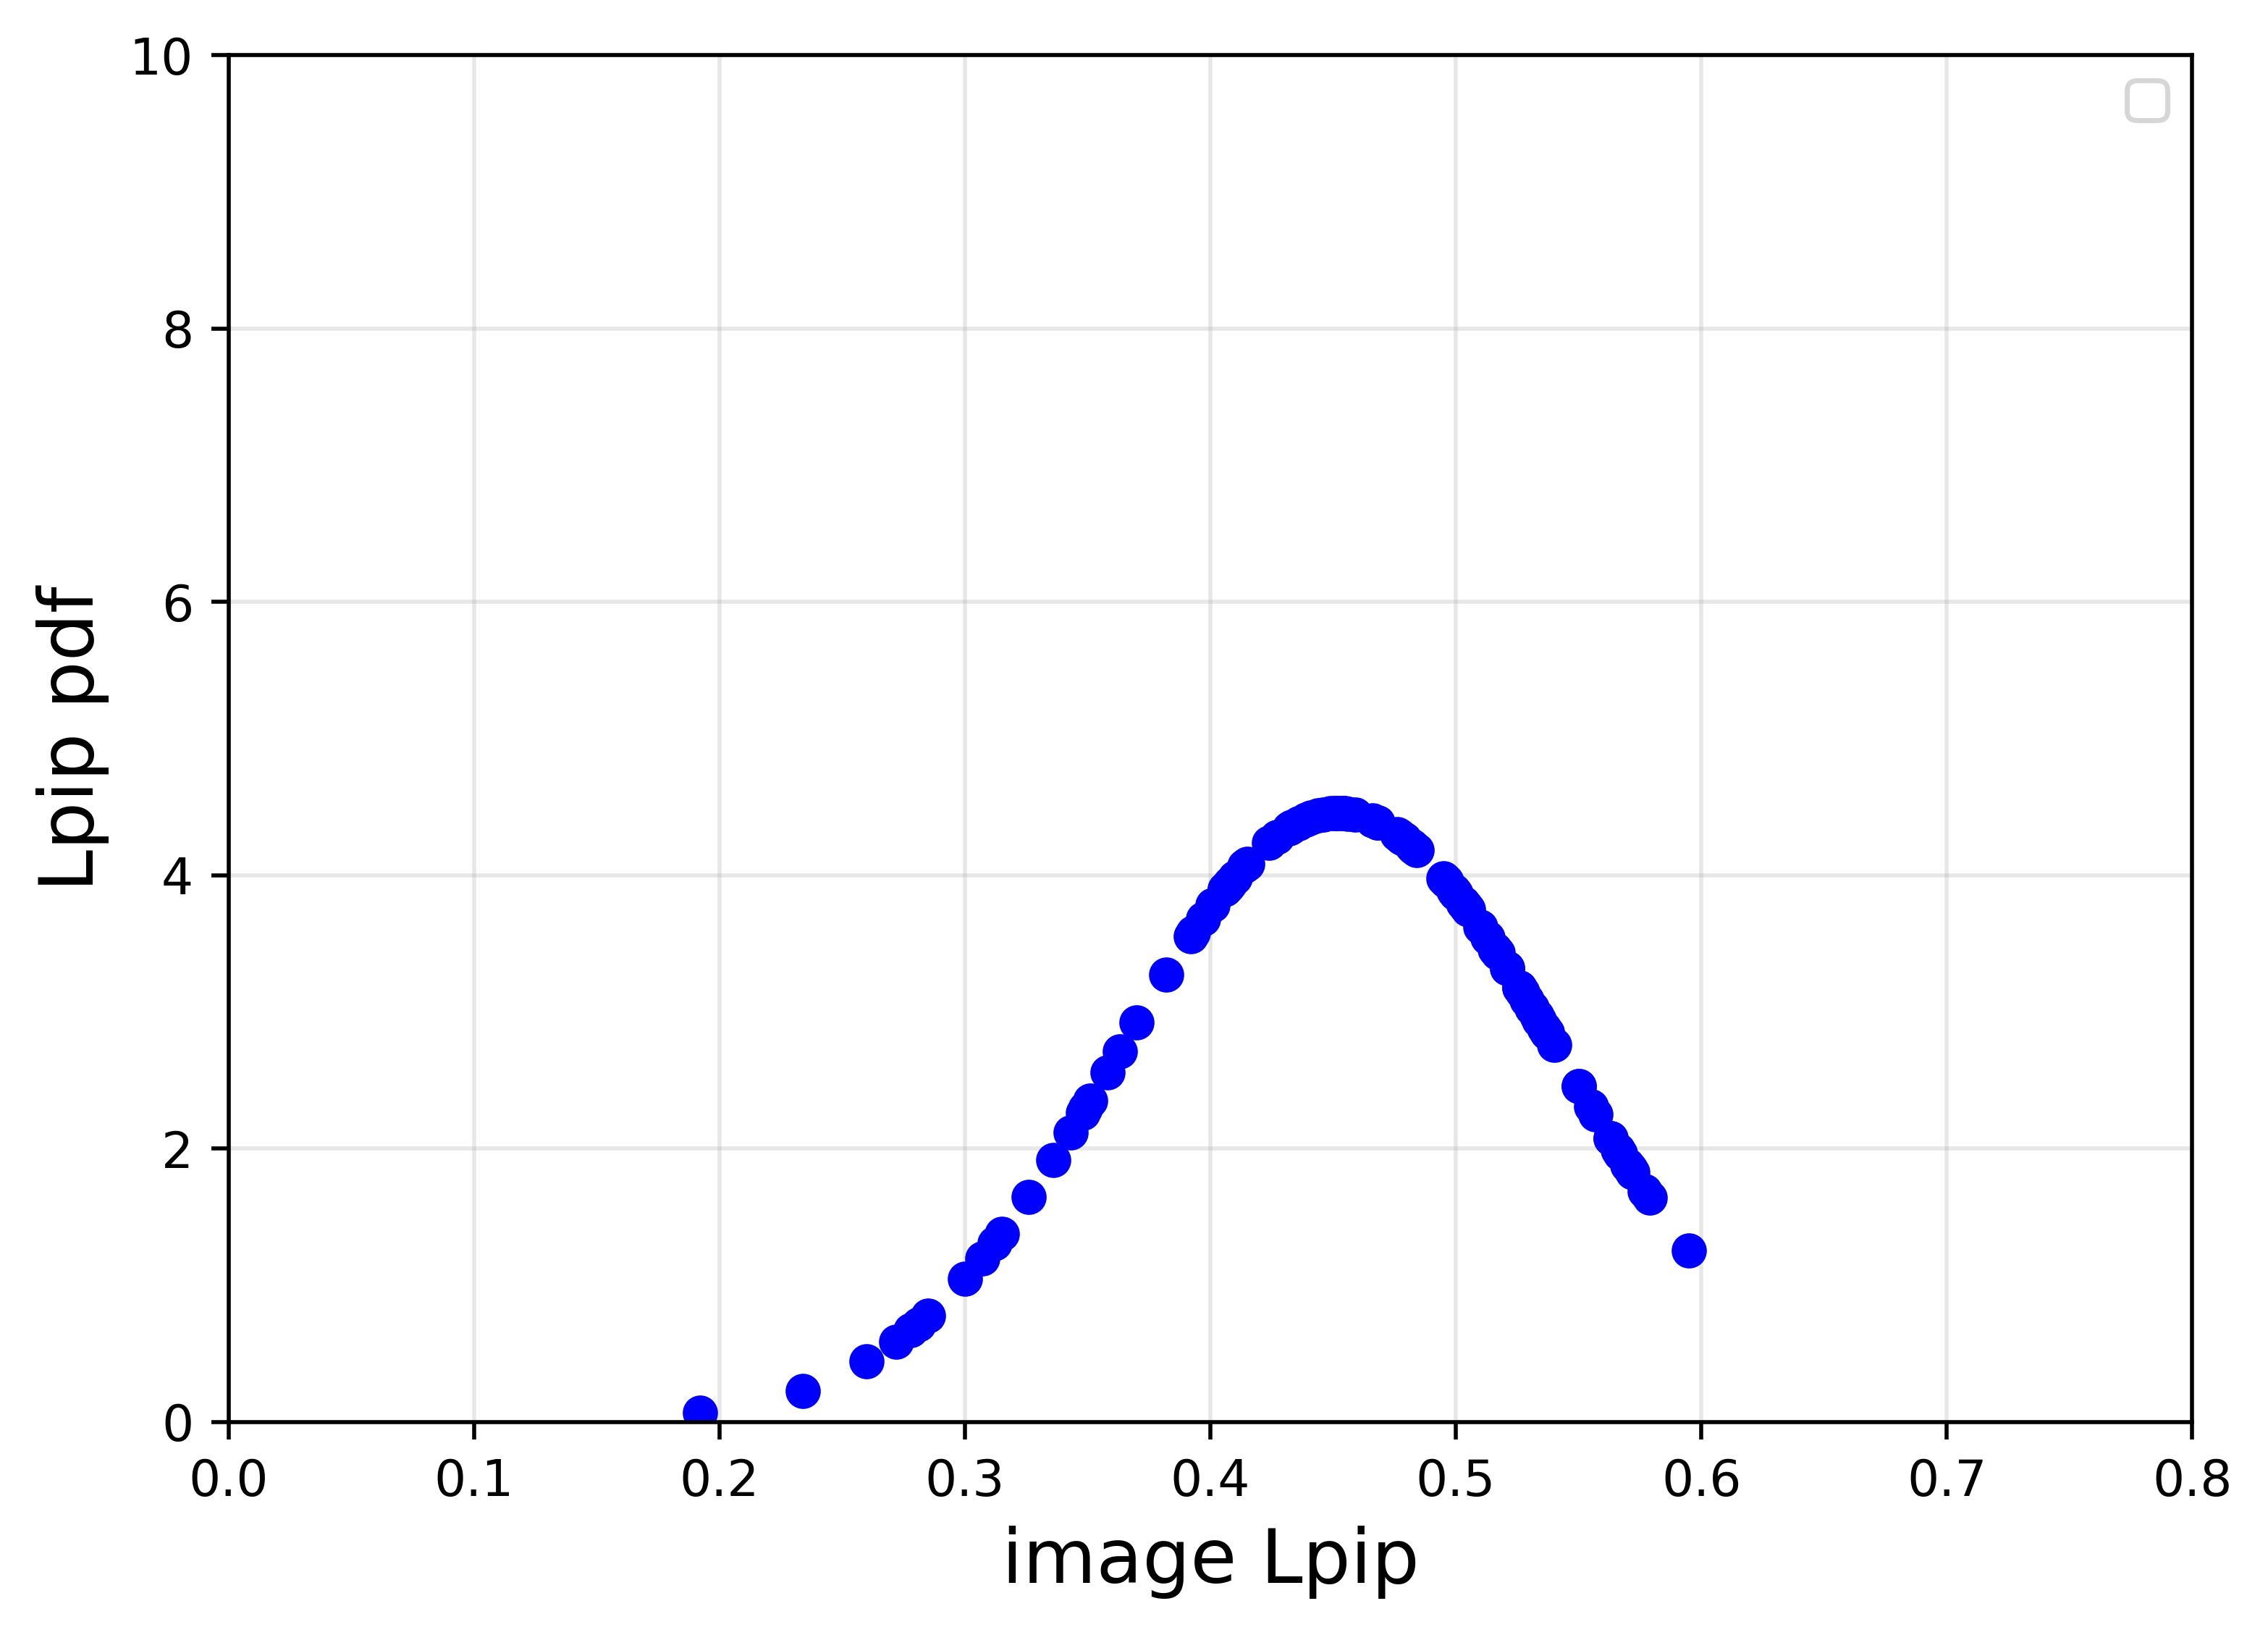

In [ ]:
#정규분포
from pylab import rcParams
plt.plot(x, pdf, 'bo')
plt.xlim([0,0.8])
plt.ylim([0,10])
plt.legend()
plt.xlabel("image Lpip", size=15)  #각 이미지에 대한 Lpip 값의 확률밀도함수 값
plt.ylabel("Lpip pdf", size=15)  #각 이미지에 대한 Lpip 값
plt.grid(True, alpha=0.3, linestyle="-")
plt.rcParams["figure.figsize"] = [7,5]  # 가로, 세로 인치 조정
plt.rcParams["figure.dpi"] = 500   # 해상도 조정
plt.show()

# PPL test

In [ ]:
text = 'Hello world, python'
strings = text.split()
print(strings)

In [22]:
# readline_all.py
f = open("/content/drive/MyDrive/설다경/test/log.txt", 'r')
i=0
li=[]
while True:
    i+=1
    line = f.readline()
    if not line: break
    strings = line.split()
    if(i%3==0): 
      s=strings[2]
      n=float(s[0:len(s)-2])
      li.append(n)
      # print(s[0:len(s)-2])
f.close()

In [23]:
# for i in range(0,len(li)):
#   print(li[i])
# li.sort()
li

[46.42912673950195,
 8.553186416625977,
 4.3232574462890625,
 2.03253173828125,
 1.3377717733383179,
 1.3408013582229614,
 1.4229316711425781,
 1.9623067378997803,
 2.0145761966705322,
 2.0301730632781982,
 2.4971134662628174,
 2.283308982849121,
 2.2828736305236816,
 3.024597644805908,
 2.939133882522583,
 3.326847553253174,
 3.0952441692352295,
 2.9351680278778076,
 2.866147994995117,
 2.54384446144104,
 2.7041311264038086,
 2.935185670852661,
 2.969829559326172,
 3.1675965785980225,
 3.07200026512146,
 3.0553481578826904,
 3.2073824405670166,
 3.3894996643066406,
 3.4521257877349854,
 3.408937454223633,
 3.420051336288452,
 3.5065054893493652,
 3.533377170562744,
 3.5203473567962646,
 3.483804225921631,
 3.3260533809661865,
 3.553351879119873,
 3.8032989501953125,
 3.90102481842041,
 3.886517286300659,
 4.079860210418701,
 4.136211395263672,
 4.2088165283203125,
 4.4481611251831055,
 4.722364902496338,
 4.978139400482178,
 5.19950532913208,
 5.387121200561523,
 5.412428379058838,
 5

In [24]:
import matplotlib.pyplot as plt

In [25]:
x=[]
for i in range(0,len(li)):
  x.append(i)

<BarContainer object of 764 artists>

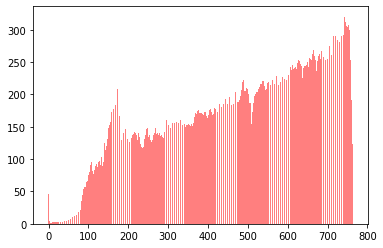

In [26]:
plt.bar(x, li, color='red', alpha=0.5, linewidth=2)